# Import

In [42]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from prophet import Prophet # fbprophet is now just prophet
from sklearn.ensemble import VotingRegressor # StackingRegressor for stacking
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings

# Configure

In [43]:

warnings.filterwarnings('ignore')

# --- 0. Configuration & Helper Functions ---
TARGET_VARIABLE = 'net_operating_income_to_assets'
FEATURE_VARIABLES = ['net_operating_income_to_assets', 'gdp_yoy', 'cpi_yoy', 'cons_sentiment', 'unemployment', 
                     'household_delinq', 'tbill_3m', 'tbill_10y', 'spread_10y_3m']
FORECAST_HORIZONS = list(range(1, 9))  # 1 to 8 quarters ahead
# Test split ratio
TEST_SPLIT_RATIO = 0.2



# Load

In [44]:

# Load accounting_data_processed.parquet in the folder data/fred
accounting_data = pd.read_parquet('data/fred/accounting_data_processed.parquet')
macro_data = pd.read_parquet('data/fred/macro_data_processed.parquet')
df = pd.merge(accounting_data, macro_data, on='date', how='left')
# Drop observations after a certain date
# df = df[df.index <= '2011-12-31']

# Data preparation

In [45]:

# Create lagged features and target variables. Take TARGET_VARIABLE and FEATURES_VARIABLES and do the following: 
# 1. Check whether the variable without "_lagx" exists in the dataframe
# 2. If it exists, create lagged features for the variable, with number of lags indicated by the last digit (i.e. ..._lag1)
# 3. Create an X and y dataframe consisting of the TARGET_VARIABLE and the FEATURES_VARIABLES
# 4. Drop any rows with NaN values

def create_lagged_features_and_target(df, target_variable, feature_variables, max_lag=8):
    variables = [target_variable] + feature_variables
    # Create lagged features
    for var in variables:
        # Check if it is a lagged variable
        if '_lag' in var:
            # Extract the base variable name and lag number
            base_var = var.split('_lag')[0]
            lag_num = int(var.split('_lag')[1])
            # Check if the base variable exists in the dataframe
            if base_var in df.columns:
                # Create lagged feature
                df[var] = df[base_var].shift(lag_num)
    return df


df = create_lagged_features_and_target(df, TARGET_VARIABLE, FEATURE_VARIABLES)
df = df.dropna()

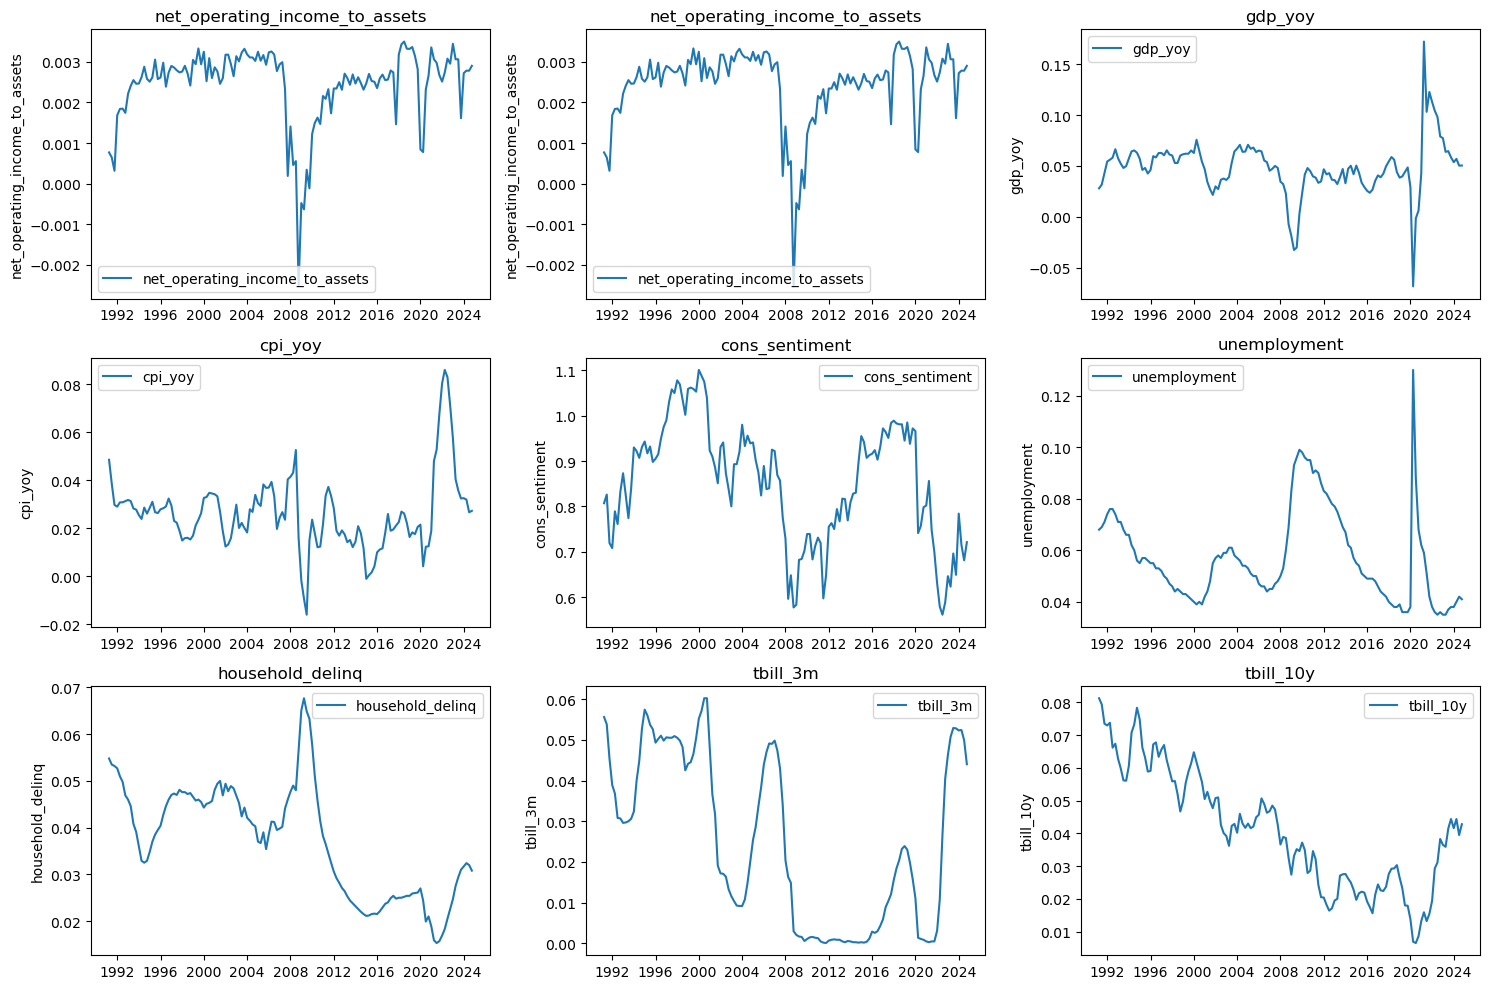

In [46]:
# Chart the target and feature variables in three columns, facetted
# by date. Use matplotlib to plot the target variable and the feature variables.
def plot_target_and_features(df, target_variable, feature_variables):
    plt.figure(figsize=(15, 10))
    variables_to_plot = [target_variable] + feature_variables[:8]  # Limit to 8 feature variables + target
    for i, var in enumerate(variables_to_plot):
        plt.subplot(3, 3, i + 1)
        plt.plot(df.index, df[var], label=var)
        plt.title(var)
        plt.ylabel(var)
        plt.legend()
    plt.tight_layout()
    plt.show()
plot_target_and_features(df, TARGET_VARIABLE, FEATURE_VARIABLES)



# Test for stationarity

In [3]:
# Test for stationarity
from statsmodels.tsa.stattools import adfuller

x = adfuller(df[TARGET_VARIABLE])
print(f"ADF Statistic: {x[0]}")
print(f"p-value: {x[1]}")
# If p-value < 0.05, we can reject the null hypothesis and conclude that the time series is stationary


NameError: name 'df' is not defined

# Run regressions


--- Training models for 1-quarter ahead forecast ---


/opt/miniconda3/envs/myenv_prophet/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.669e+05, tolerance: 1.944e+05
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/envs/myenv_prophet/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.679e+05, tolerance: 1.944e+05
  model = cd_fast.enet_coordinate_descent(
22:29:44 - cmdstanpy - INFO - Chain [1] start processing
22:29:44 - cmdstanpy - INFO - Chain [1] done processing
/opt/miniconda3/envs/myenv_prophet/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objectiv


--- Training models for 2-quarter ahead forecast ---


22:29:45 - cmdstanpy - INFO - Chain [1] start processing
22:29:45 - cmdstanpy - INFO - Chain [1] done processing



--- Training models for 3-quarter ahead forecast ---


22:29:45 - cmdstanpy - INFO - Chain [1] start processing
22:29:45 - cmdstanpy - INFO - Chain [1] done processing
/opt/miniconda3/envs/myenv_prophet/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.590e+05, tolerance: 1.549e+05
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/envs/myenv_prophet/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.602e+05, tolerance: 1.549e+05
  model = cd_fast.enet_coordinate_descent(



--- Training models for 4-quarter ahead forecast ---


22:29:46 - cmdstanpy - INFO - Chain [1] start processing
22:29:46 - cmdstanpy - INFO - Chain [1] done processing
/opt/miniconda3/envs/myenv_prophet/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.042e+06, tolerance: 1.596e+05
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/envs/myenv_prophet/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.042e+06, tolerance: 1.596e+05
  model = cd_fast.enet_coordinate_descent(



--- Training models for 5-quarter ahead forecast ---


22:29:47 - cmdstanpy - INFO - Chain [1] start processing
22:29:47 - cmdstanpy - INFO - Chain [1] done processing
/opt/miniconda3/envs/myenv_prophet/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.350e+05, tolerance: 7.104e+03
  model = cd_fast.enet_coordinate_descent(



--- Training models for 6-quarter ahead forecast ---


22:29:47 - cmdstanpy - INFO - Chain [1] start processing
22:29:47 - cmdstanpy - INFO - Chain [1] done processing
/opt/miniconda3/envs/myenv_prophet/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.453e+04, tolerance: 4.467e+03
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/envs/myenv_prophet/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.259e+06, tolerance: 3.512e+04
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/envs/myenv_prophet/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objectiv


--- Training models for 7-quarter ahead forecast ---


22:29:48 - cmdstanpy - INFO - Chain [1] start processing
22:29:48 - cmdstanpy - INFO - Chain [1] done processing



--- Training models for 8-quarter ahead forecast ---


22:29:49 - cmdstanpy - INFO - Chain [1] start processing
22:29:49 - cmdstanpy - INFO - Chain [1] done processing




--- Final Model Performance Summary ---
    Horizon              Model           MAE          RMSE         R2
3         1              Ridge  10394.845802  14590.102022   0.265224
8         1    Voting Ensemble  10644.407096  14625.752047   0.261629
4         1        Elastic Net  11614.426031  15687.522582   0.150532
6         1            XGBoost  15018.424216  18187.171675  -0.141744
0         1    Dummy Regressor  13496.222006  19378.508536  -0.296221
2         1              Lasso  16559.635074  19972.720300  -0.376933
7         1            Prophet  15968.305272  20939.286998  -0.513429
5         1      Decision Tree  20937.150506  23166.765385  -0.852547
1         1  Linear Regression  20443.268235  23391.602333  -0.888680
16        2            Prophet  11889.342776  14888.946017   0.234815
15        2            XGBoost  13908.782798  17474.656927  -0.054037
14        2      Decision Tree  16237.223510  19060.009667  -0.253963
9         2    Dummy Regressor  13596.301523  19

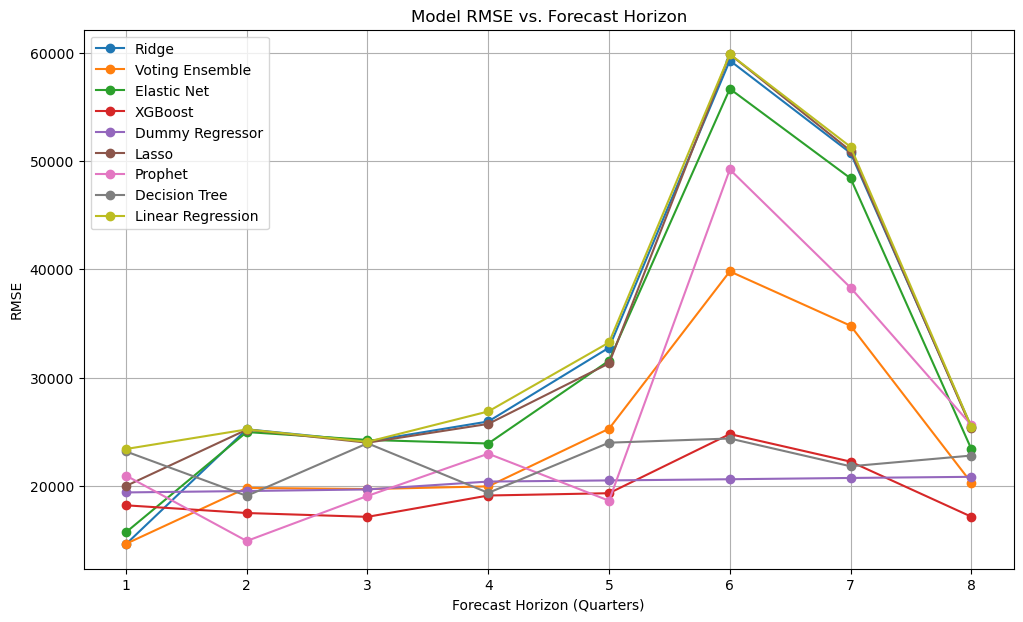

In [103]:

def create_multistep_target(df, variable_name, horizon):
    df[f'{variable_name}_target_h{horizon}'] = df[variable_name].shift(-horizon)
    return df
TARGET_TO_PREDICT = TARGET_VARIABLE

# For debugging, let's collect the target variable and features
debug_df_target = {}
debug_df_features = {}

results_store = {}  # Store results for each horizon

# --- Iterate through each forecast horizon ---
for horizon in FORECAST_HORIZONS:
    print(f"\n--- Training models for {horizon}-quarter ahead forecast ---")
    results_store[horizon] = {}
    debug_df_target[horizon] = []
    debug_df_features[horizon] = []

    # Create target for this specific horizon
    df_h = df.copy()
    df_h = create_multistep_target(df_h, TARGET_TO_PREDICT, horizon)
    df_h.dropna(inplace=True) # Remove NaNs created by shifting target

    if df_h.empty:
        print(f"DataFrame is empty for horizon {horizon} after creating target. Skipping.")
        continue

    y = df_h[f'{TARGET_TO_PREDICT}_target_h{horizon}'].copy()
    X = df_h = df_h[FEATURE_VARIABLES].copy()


    # Ensure no future data leakage in X (lags should be from t or earlier)
    # All our lags are .shift(i) where i > 0, so they are from the past.

    if X.empty or y.empty:
        print(f"X or y is empty for horizon {horizon}. Skipping.")
        continue

    # Time Series Split
    # n_splits_cv = max(2, min(5, len(X) // (len(X) // 10))) # Ensure at least 2 splits, max 5, or 10% test size
    n_splits_cv = 3 # Common choice, adjust based on data size
    if len(X) < n_splits_cv * 2 : # Basic check to ensure enough samples for splits
        print(f"Not enough samples for {n_splits_cv} splits with horizon {horizon}. Reducing splits or skipping.")
        if len(X) >= 4: # Minimum for 2 splits
            n_splits_cv = 2
        else:
            continue # Skip if not enough data
            
    tscv = TimeSeriesSplit(n_splits=n_splits_cv)

    # Split data into a final training set and a hold-out test set
    # The last 'test_size' proportion of data will be for the final test
    test_set_size = int(len(X) * TEST_SPLIT_RATIO)
    if test_set_size < 1:
        print(f"Test set size too small for horizon {horizon}. Skipping.")
        continue
    else:
        X_train, X_test = X[:-test_set_size], X[-test_set_size:]
        y_train, y_test = y[:-test_set_size], y[-test_set_size:]


    if X_train.empty or y_train.empty:
        print(f"Training set is empty after final split for horizon {horizon}. Skipping.")
        continue

    # --- Feature Scaling ---
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    # Convert back to DataFrame for column names if needed by some models, or use numpy arrays
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

    debug_df_features[horizon] = {}
    debug_df_features[horizon]['X_train'] = X_train.copy()
    debug_df_features[horizon]['X_train_scaled'] = X_train_scaled.copy()
    debug_df_features[horizon]['X_test'] = X_test.copy()
    debug_df_features[horizon]['X_test_scaled'] = X_test_scaled.copy()

    debug_df_target[horizon] = {}
    debug_df_target[horizon]['y_train'] = y_train.copy()
    debug_df_target[horizon]['y_test'] = y_test.copy()

    # --- Model Definitions and Hyperparameter Grids ---
    class DummyRegressor():
        def __init__(self, strategy="mean"):
            self.strategy = strategy
            self.mean = None

        def fit(self, X, y):
            if self.strategy == "mean":
                self.mean = y.mean()
            else:
                raise NotImplementedError("Only mean strategy is implemented")

        def predict(self, X):
            if self.mean is None:
                raise ValueError("Model not fitted yet")
            return np.full(len(X), self.mean)

    models = {
        "Dummy Regressor": DummyRegressor(strategy="mean"),
        "Linear Regression": LinearRegression(),
        "Lasso": Lasso(random_state=42, max_iter=10000),
        "Ridge": Ridge(random_state=42, max_iter=10000),
        "Elastic Net": ElasticNet(random_state=42, max_iter=10000),
        "Decision Tree": DecisionTreeRegressor(random_state=42),
        "XGBoost": XGBRegressor(random_state=42, objective='reg:squarederror')
        # "Neural Network": KerasRegressor(build_fn=create_nn_model, epochs=50, batch_size=32, verbose=0) # Placeholder
    }

    param_grids = {
        "Lasso": {'alpha': [0.001, 0.01, 0.1, 1, 10]},
        "Ridge": {'alpha': [0.001, 0.01, 0.1, 1, 10]},
        "Elastic Net": {'alpha': [0.01, 0.1, 1], 'l1_ratio': [0.1, 0.5, 0.9]},
        "Decision Tree": {'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10]},
        "XGBoost": {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 5, 7, 9],
            'subsample': [0.7, 0.8], # Add more for thorough search
            'colsample_bytree': [0.7, 0.8]
        }
        # "Neural Network": {'optimizer': ['adam', 'rmsprop'], 'dropout_rate': [0.1, 0.2]} # Example
    }

    # --- Train and Evaluate Models (excluding Prophet for now) ---
    for name, model in models.items():
        if name in param_grids:
            search = GridSearchCV(model, param_grids[name], cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)
            search.fit(X_train_scaled, y_train) # Use scaled data for these models
            best_model = search.best_estimator_
            # print(f"    Best params for {name}: {search.best_params_}")
        else: # Linear Regression (no grid search here, but can be added)
            best_model = model
            best_model.fit(X_train_scaled, y_train)

        predictions = best_model.predict(X_test_scaled)

        # If differencing was used, inverse transform predictions and y_test
        # if TARGET_TO_PREDICT == f'{TARGET_VARIABLE}_diff':
        #     last_obs_train = df[TARGET_VARIABLE].iloc[X_train_main.index[-1]] # This needs careful indexing
        #     # This inverse transform needs to be carefully aligned with the multi-step nature
        #     # For direct forecasting, y_test and predictions are already at the target scale if y was differenced correctly
        #     # The inverse differencing is more complex for multi-step. Simpler if target wasn't differenced.

        mae = mean_absolute_error(y_test, predictions)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, predictions)
        mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100  # Mean Absolute Percentage Error
        results_store[horizon][name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2, 'MAPE': mape, 'model_object': best_model, 
                                        'X_train_scaled': X_train_scaled, 'y_train': y_train, 'X_test_scaled': X_test_scaled, 'y_test': y_test}
    
    
    # --- Prophet Model ---
    # Prophet requires a DataFrame with 'ds' (datetime) and 'y' (target) columns.
    # Additional regressors are added with add_regressor.
    prophet_train_df = X_train.copy()
    prophet_train_df['ds'] = prophet_train_df.index
    prophet_train_df['y'] = y_train

    # Select only original features + their lags for Prophet regressors (no interaction terms etc.)
    # Prophet regressors should be known for future periods you want to predict.
    # For multi-step, this means you need forecasts of your regressors if they are not purely lagged.
    # For now, we assume all X columns are valid as regressors (lagged known values)
    
    regressors_for_prophet = [col for col in X_train.columns] # All X columns are lagged

    # Prophet model for each horizon
    # For direct multi-step with Prophet, this usually means y is already shifted.
    # Regressors must be available at the time of prediction.
    
    # If you are predicting `y_t+h`, your regressors should be `x_t`, `x_t-1`, etc.
    # And for the future dataframe passed to prophet.predict, these regressor values must exist.
    
    # Simpler Prophet: just use time series and let it forecast, then add regressors
    m_prophet = Prophet(
        # changepoint_prior_scale=0.05, # Example hyperparams
        # seasonality_prior_scale=10.0,
        # yearly_seasonality=False, # NCO rates might not have strong yearly seasonality, more cyclical
        # weekly_seasonality=False,
        # daily_seasonality=False
    )
    
    for regressor in regressors_for_prophet:
        # Prophet handles scaling of regressors internally by default, but providing scaled can be okay
        # Here, we use unscaled regressors from X_train_main directly for Prophet, as it can handle them.
        # If using X_train_scaled_df, ensure consistency.
        m_prophet.add_regressor(regressor)


    m_prophet.fit(prophet_train_df[['ds', 'y'] + regressors_for_prophet])

    # Create future dataframe for Prophet
    # The 'future' dataframe for Prophet needs the 'ds' column and all regressor columns for the periods to be predicted.
    # For our direct forecasting setup, the X_test already contains the regressors at the right time.
    future_df = X_test.copy()
    future_df['ds'] = future_df.index
    
    if future_df.empty or not all(reg in future_df.columns for reg in regressors_for_prophet):
        print(f"    Prophet future_df is missing regressors or is empty for horizon {horizon}. Skipping Prophet.")
    else:
        try:
            forecast_prophet = m_prophet.predict(future_df[['ds'] + regressors_for_prophet])
            predictions_prophet = forecast_prophet['yhat'].values[-len(y_test):] # Align with y_test

            mae_p = mean_absolute_error(y_test, predictions_prophet)
            mse_p = mean_squared_error(y_test, predictions_prophet)
            rmse_p = np.sqrt(mse_p)
            r2_p = r2_score(y_test, predictions_prophet)
            results_store[horizon]['Prophet'] = {'MAE': mae_p, 'MSE': mse_p, 'RMSE': rmse_p, 'R2': r2_p, 'model_object': m_prophet}
        except Exception as e:
            print(f"    Error during Prophet prediction for horizon {horizon}: {e}")


    # --- (Optional) Ensemble Model: Voting Regressor ---
    # Only include models that performed reasonably well if desired
    # Check if we have enough trained models for an ensemble
    trained_models_for_ensemble = []
    if 'XGBoost' in results_store[horizon] and 'Ridge' in results_store[horizon]: # Example condition
        xgb_model = results_store[horizon]['XGBoost']['model_object']
        ridge_model = results_store[horizon]['Ridge']['model_object']
        # Note: Ensure base models for VotingRegressor are already fitted.
        # Re-fitting here for simplicity on the full X_train_scaled, y_train_main
        # Ideally, they are already the best_estimators from GridSearchCV
        
        # We need to ensure models are retrained or use the ones already trained
        # For simplicity, assume best_model from above are already fitted on X_train_scaled
        
        # Let's use the model objects stored from the previous loop
        ensemble_estimators = []
        if 'XGBoost' in results_store[horizon] and results_store[horizon]['XGBoost'].get('model_object'):
            ensemble_estimators.append(('xgb', results_store[horizon]['XGBoost']['model_object']))
        if 'Ridge' in results_store[horizon] and results_store[horizon]['Ridge'].get('model_object'):
             ensemble_estimators.append(('ridge', results_store[horizon]['Ridge']['model_object']))
        # Add other models as desired

        if len(ensemble_estimators) >= 2:
            voting_reg = VotingRegressor(estimators=ensemble_estimators)
            # VotingRegressor will be fit on X_train_scaled, y_train_main
            # The individual estimators should ideally already be tuned and fitted
            # However, VotingRegressor's fit method will call fit on unfitted estimators.
            # If estimators are already cloned and fitted (like from GridSearchCV's best_estimator_), it's fine.
            
            try:
                voting_reg.fit(X_train_scaled, y_train) # Fit the ensemble
                predictions_ensemble = voting_reg.predict(X_test_scaled)

                mae_e = mean_absolute_error(y_test, predictions_ensemble)
                mse_e = mean_squared_error(y_test, predictions_ensemble)
                rmse_e = np.sqrt(mse_e)
                r2_e = r2_score(y_test, predictions_ensemble)
                results_store[horizon]['Voting Ensemble'] = {'MAE': mae_e, 'MSE': mse_e, 'RMSE': rmse_e, 'R2': r2_e, 'model_object': voting_reg}
            except Exception as e:
                 print(f"    Error training Voting Regressor for horizon {horizon}: {e}")
        else:
            print("    Not enough base models for Voting Regressor.")


# --- 4. Aggregate and Display Results ---
print("\n\n--- Final Model Performance Summary ---")
summary_df = pd.DataFrame()
for horizon, models_results in results_store.items():
    for model_name, metrics in models_results.items():
        if isinstance(metrics, dict): # Ensure 'metrics' is a dictionary
            temp_df = pd.DataFrame({
                'Horizon': [horizon],
                'Model': [model_name],
                'MAE': [metrics.get('MAE', np.nan)],
                'RMSE': [metrics.get('RMSE', np.nan)],
                'R2': [metrics.get('R2', np.nan)]
            })
            summary_df = pd.concat([summary_df, temp_df], ignore_index=True)

if not summary_df.empty:
    summary_df = summary_df.sort_values(by=['Horizon', 'RMSE'])
    print(summary_df.to_string())

    # Plot RMSE by Horizon for each model
    plt.figure(figsize=(12, 7))
    for model_name in summary_df['Model'].unique():
        model_data = summary_df[summary_df['Model'] == model_name]
        plt.plot(model_data['Horizon'], model_data['RMSE'], marker='o', label=model_name)
    plt.xlabel("Forecast Horizon (Quarters)")
    plt.ylabel("RMSE")
    plt.title("Model RMSE vs. Forecast Horizon")
    plt.legend()
    plt.grid(True)
    plt.xticks(FORECAST_HORIZONS)
    plt.show()
else:
    print("No results to display. Check for errors during model training or evaluation.")


# --- Discussion on Prophet ---
# Prophet is well-suited for time series that have:
# 1. Clear seasonality (yearly, weekly, daily - though less relevant for quarterly NCO).
# 2. Trend changes (changepoints).
# 3. Holiday effects (can be specified).
# 4. Ability to include external regressors.

# For your use case:
# - Strengths: Can model underlying time series dynamics and incorporate your macro/balance sheet data as regressors.
#              Robust to missing data and shifts in trend. Relatively easy to use.
# - Considerations for multi-step with regressors:
#   - When you call `m.predict(future_df)`, `future_df` MUST contain the values of the regressors for the future dates.
#   - In a real forecasting scenario for h-steps ahead, you would need *forecasts* of your regressors for h-steps ahead if they are not purely lagged known values.
#   - Since all your `X` features in this script are lagged values from time `t` or `t-k` (where `k>=0`) when predicting `t+h`, they are known at the time of prediction. So, the current setup is valid.
# - Hyperparameter tuning for Prophet can be done via iterating through parameter combinations and evaluating, similar to GridSearchCV but often done manually or with custom loops due to Prophet's API.

# --- Further Steps / Improvements ---
# 1.  **Rigorous Stationarity Testing:** Use ADF, KPSS tests.
# 2.  **More Sophisticated Lag Selection:** Cross-correlation functions (CCF) between predictors and target.
# 3.  **Neural Network Implementation:** Implement the KerasRegressor part fully if desired.
#     - Define `create_nn_model(optimizer='adam', dropout_rate=0.1)` function that returns a compiled Keras model.
# 4.  **Advanced Ensembling:** StackingRegressor.
# 5.  **Error Analysis:** Look at residuals, plot predictions vs. actuals for best models.
# 6.  **Confidence Intervals:** Prophet provides them by default. For other models, bootstrapping can be used.
# 7.  **Real-world Data:** The dummy data is just for structure. Performance heavily depends on real data characteristics.
# 8.  **Feature Importance:** For tree-based models (XGBoost, Decision Tree) and Lasso, check feature importances.

# Tests

In [104]:
X_train_scaled_df

,net_operating_income,gdp,cpi,cons_sentiment,unemployment,household_delinq,tbill_3m,tbill_10y,spread_10y_3m
date,,,,,,,,,
1991-04-01,-1.882437,-1.520668,-1.679718,-1.260649,1.290997,1.983410,1.140989,2.109373,0.591230
1991-07-01,-1.948974,-1.483303,-1.621684,-1.061157,1.390817,1.739894,1.024474,1.944590,0.582399
1991-10-01,-2.134259,-1.455611,-1.558031,-2.184612,1.590455,1.683698,0.480735,1.432894,0.803172
1992-01-01,-1.374453,-1.409037,-1.505559,-2.300107,1.889914,1.590038,0.059984,1.389530,1.333028
1992-04-01,-1.290713,-1.358163,-1.445670,-1.449641,2.089552,1.271593,-0.075951,1.458912,1.589124
1992-07-01,-1.282802,-1.312857,-1.385726,-1.743629,2.089552,1.046809,-0.464336,0.799778,1.447830
1992-10-01,-1.340039,-1.258912,-1.316455,-0.998160,1.889914,0.503580,-0.470809,0.903852,1.562632
1993-01-01,-1.080365,-1.235920,-1.258364,-0.567677,1.590455,0.334991,-0.542013,0.504902,1.253549
1993-04-01,-0.959486,-1.198363,-1.200330,-1.071657,1.590455,0.072743,-0.535540,0.253391,0.988622


## Plot for each model errors vs. predicted values

Dummy Regressor
Linear Regression
Lasso
Ridge
Elastic Net
Decision Tree
XGBoost


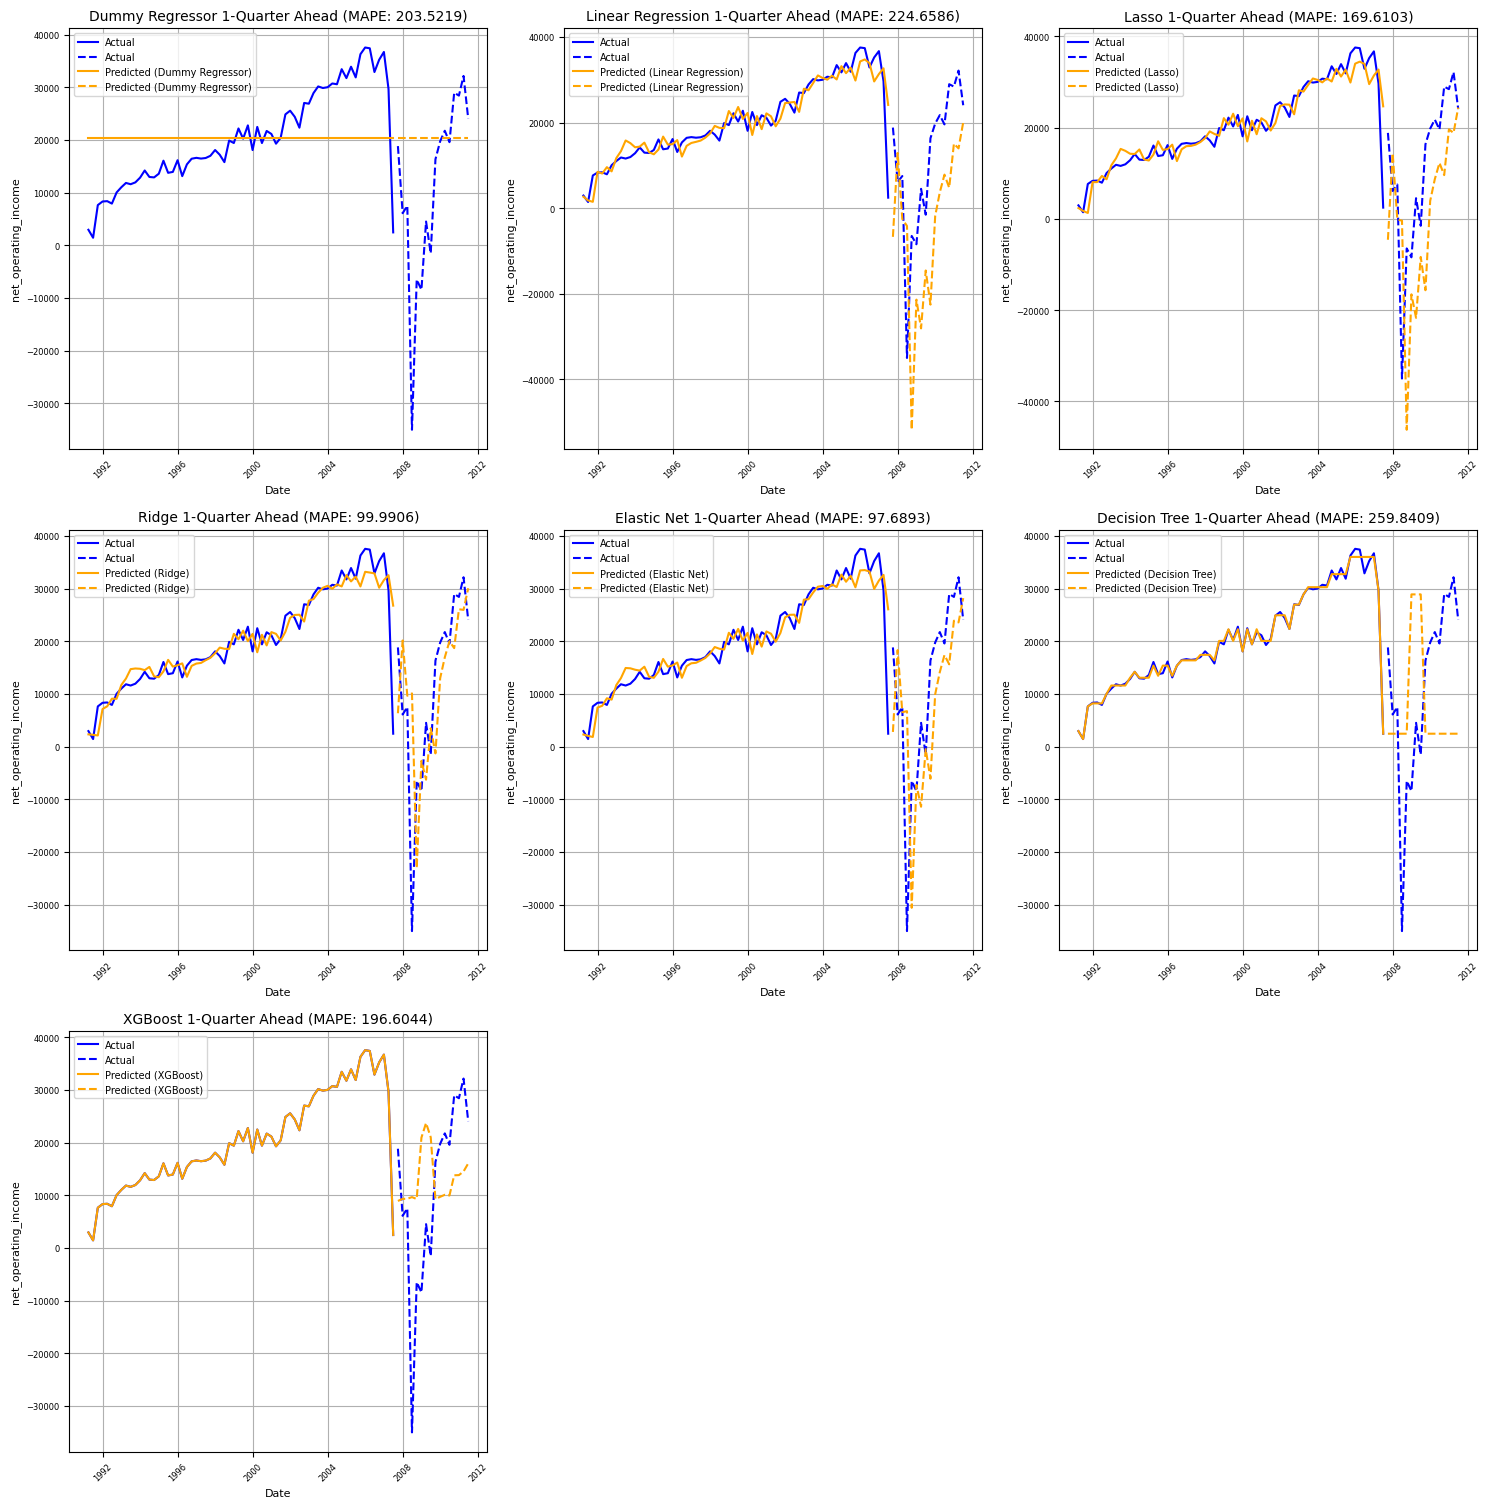

In [105]:
import math

from pyparsing import line

# Plot for each model predictions vs actuals in 3-column facets

num_models = sum(len(models_results) for models_results in results_store.values())
num_cols = 3
num_rows = math.ceil(num_models / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

plot_index = 0

# Select from results_store the three models that performed best in the test set in terms of RMSE for horizon 1
results_store_filtered = results_store.copy()
# Filter results_store for horizon 1
results_store_filtered = {horizon: models_results for horizon, models_results in results_store.items() if horizon == 1}


for horizon, models_results in results_store_filtered.items():
    #if horizon > 1: break
    for model_name, metrics in models_results.items():
        
        if 'model_object' in metrics and model_name != 'Prophet' and model_name != "Voting Ensemble":
            print(model_name)
            X_data_train = models_results[model_name]['X_train_scaled']
            y_data_train = models_results[model_name]['y_train']

            X_data_test = models_results[model_name]['X_test_scaled']
            y_data_test = models_results[model_name]['y_test']

            mae = metrics['MAE']
            rmse = metrics['RMSE']
            mape = metrics['MAPE']

            ax = axes[plot_index]
            model = metrics['model_object']
            if hasattr(model, 'predict'):
                # Get predictions
                predictions_train = model.predict(X_data_train)
                predictions_test = model.predict(X_data_test)

                # Plotting
                ax.plot(y_data_train.index, y_data_train.values, label='Actual', color='blue')
                ax.plot(y_data_test.index, y_data_test.values, label='Actual', color='blue', linestyle='dashed')
    
                ax.plot(y_data_train.index, predictions_train, label=f'Predicted ({model_name})', color='orange')
                ax.plot(y_data_test.index, predictions_test, label=f'Predicted ({model_name})', color='orange', linestyle='dashed')
                ax.set_title(f'{model_name} {horizon}-Quarter Ahead (MAPE: {mape:.4f})', fontsize=10)
                ax.set_xlabel('Date', fontsize=8)
                ax.set_ylabel(TARGET_VARIABLE, fontsize=8)
                ax.tick_params(axis='x', rotation=45, labelsize=6)
                ax.tick_params(axis='y', labelsize=6)
                ax.legend(fontsize=7)
                ax.grid(True)

                plot_index += 1

# Remove empty subplots if the number of models is not a multiple of num_cols
if plot_index < len(axes):
    for i in range(plot_index, len(axes)):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [106]:
debug_df_features[1]['X_train']['net_operating_income']

date
1991-04-01     3495.03511
1991-07-01     2952.09662
1991-10-01     1440.17283
1992-01-01     7640.16761
1992-04-01     8323.48921
                 ...     
2006-07-01    37400.82699
2006-10-01    32896.05707
2007-01-01    35227.38525
2007-04-01    36704.06241
2007-07-01    29668.29543
Name: net_operating_income, Length: 66, dtype: float64

In [107]:
# Check target and feature variables for different forecasting horizons
check_data_horizons = (pd
                       .merge(debug_df_target[1]['y_train'], 
                              debug_df_features[1]['X_train'][TARGET_VARIABLE], how="left", on="date")
                       .merge(debug_df_target[2]['y_train'], how="left", on="date")
                       .merge(debug_df_features[2]['X_train'][TARGET_VARIABLE], how="left", on="date"))

check_data_horizons

,net_operating_income_target_h1,net_operating_income_x,net_operating_income_target_h2,net_operating_income_y
date,,,,
1991-04-01,2952.09662,3495.03511,1440.17283,3495.03511
1991-07-01,1440.17283,2952.09662,7640.16761,2952.09662
1991-10-01,7640.16761,1440.17283,8323.48921,1440.17283
1992-01-01,8323.48921,7640.16761,8388.03707,7640.16761
1992-04-01,8388.03707,8323.48921,7920.98610,8323.48921
...,...,...,...,...
2006-07-01,32896.05707,37400.82699,35227.38525,37400.82699
2006-10-01,35227.38525,32896.05707,36704.06241,32896.05707
2007-01-01,36704.06241,35227.38525,29668.29543,35227.38525
